# Datasets

A biblioteca `nlpbox` disponibiliza datasets e corpus em Português Brasileiro. Os datasets e corpus disponibilizados se encontram no pacote `nlpbox.data`, é possível instanciá-los diretamente através das classes.

In [1]:
from nlpbox.data.datasets.essay_br import DatasetEssayBR
from nlpbox.data.datasets.mec_ef import DatasetMecEf

In [2]:
# === Essay-BR ===
ds = DatasetEssayBR(extended=False,
                    target_competence='C1')
ds.to_frame().head(5)

,text,target,C1,C2,C3,C4,C5,score,prompt
0,A grande importância dos caminhoneiros para o ...,160,160,160,120,120,120,680,"Nas últimas semanas de maio, uma paralisação d..."
1,O senhor e eu já estamos cientes do projeto de...,160,160,160,120,120,120,680,Está em trânsito no Senado Federal um Projeto ...
2,É de conhecimento geral dos brasileiros o quão...,120,120,160,160,160,120,720,"A principal discussão política do Brasil, nest..."
3,Podemos perceber que a sociedade brasileira en...,120,120,120,80,120,120,560,\nTodos sabem: o país precisa melhorar muito ...
4,Comenta-se que o ex presidente Lula ex-preside...,0,0,0,0,0,0,0,"No início deste mês de novembro, o Supremo Tri..."


In [3]:
# === Essay-BR Estendido ===
ds = DatasetEssayBR(extended=True,
                    target_competence='C1')
ds.to_frame().head(5)

,text,target,C1,C2,C3,C4,C5,score,prompt
0,Comenta-se que o ex presidente Lula ex-preside...,0,0,0,0,0,0,0,"No início deste mês de novembro, o Supremo Tri..."
1,"Amazonas, sem ela ele os dias do brasil Brasil...",0,0,0,0,0,0,0,"No final de agosto passado, as queimadas na fl..."
2,Eu acredito que os dois são muito importantes ...,0,0,0,0,0,0,0,"De modo geral, não é segredo para ninguém que ..."
3,Assunto que repercute de forma constante nos a...,0,0,0,0,0,0,0,"No início deste mês de novembro, o Supremo Tri..."
4,O supremo tribunal federal Supremo Tribunal Fe...,0,0,0,0,0,0,0,"Ao longo dos últimos dez anos, o papel do STF ..."


In [4]:
# === Mec-EF ===
ds = DatasetMecEf(target_competence='formal_register')
ds.to_frame().head(5)

,text,target,motivating_situation,formal_register,text_typology,cohesion,thematic_coherence
0,\tAbrir a porta peguei o diamante e levei para...,4,"Chovia muito naquele dia, com trovões muito al...",4,3,4,2
1,"\tChovia muito naquele dia, com trovões muito\...",3,"Chovia muito naquele dia, com trovões muito al...",3,4,3,2
2,"\tChovia muito naquele dia, com trovões muito ...",4,"Chovia muito naquele dia, com trovões muito al...",4,3,4,3
3,\tEm um dia chovoso eu estava em casa\njogando...,3,"Chovia muito naquele dia, com trovões muito al...",3,3,4,4
4,\tEm um dia normal no meu quintal tava\nchoven...,4,"Chovia muito naquele dia, com trovões muito al...",4,4,4,3


## Como utilizar um dataset próprio?

Para utilizar um dataset próprio, só precisamos carregá-lo como um `DataFrame` e utilizar a classe `nlpbox.data.datasets.DatasetDF`.

In [5]:
import pandas as pd
from nlpbox.data.datasets import DatasetDF

In [6]:
# === Exemplo de um Dataset do Kaggle ===
# https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr?resource=download
df = pd.read_csv('Tweets_Mg.csv')
df.head(5)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Realizando um pequeno tratamento nos dados
df = df[['Text', 'Classificacao']].dropna()

# Normalização do texto
df['Text'] = df['Text'].str.lower()

# Remoção de caracteres especiais
df['Text'] = df['Text'].str.replace(r'[\w]*[^\w\s][\w]*',
                                    '',
                                    regex=True)

# Removendo possíveis NA
df = df.dropna()

# Removendo duplicados
df = df.drop_duplicates('Text')

# Convertendo coluna de classificação
df['Classificacao'] = df['Classificacao'].replace(['Positivo', 'Neutro', 'Negativo'],
                                                  [1, 0, -1])

# Exemplos
df.head(5)

,Text,Classificacao
0,catedral de santo antônio governador,0
1,governador minas gerais,0
3,,0
4,psol vai questionar aumento de vereadores e p...,-1
5,bom é bandido \ndeputado cabo júlio é condena...,0


<Axes: >

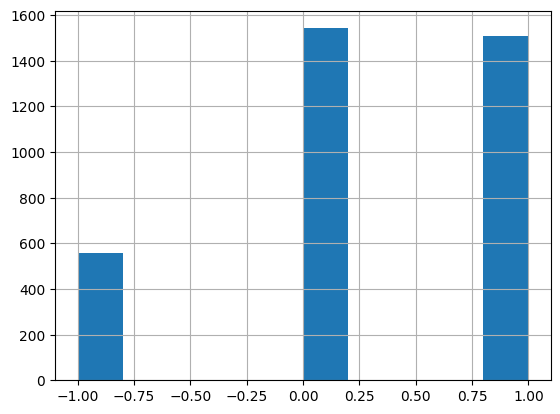

In [8]:
# === Criando Dataset ===
ds = DatasetDF(df,
               text_column='Text',
               target_column='Classificacao')
ds.to_frame().target.hist()

In [9]:
# === Obtendo splits de treino e teste ===
train, test = ds.train_test_split(0.8, True, 42)

<Axes: >

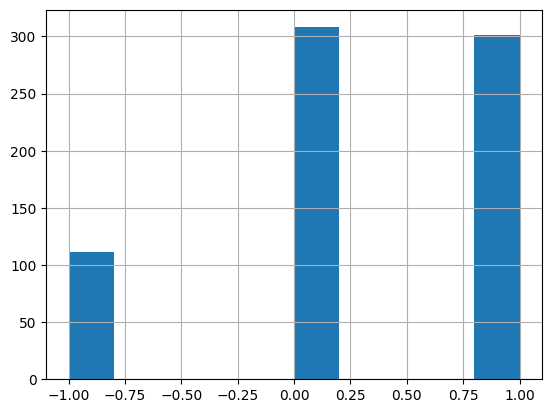

In [10]:
test.target.hist()

<Axes: >

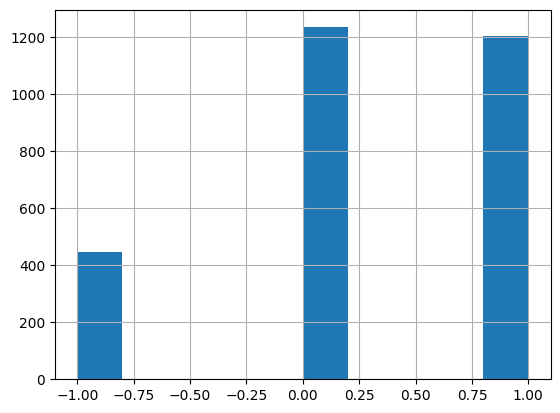

In [11]:
train.target.hist()